In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import Image
from torchvision.utils import save_image

LATENT_SIZE = 100
STATS = (0.5,0.5,0.5), (0.5,0.5,0.5)

device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [11]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            #input size: (3 x 64 x 64)
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
            #output size: (1 x 1 x 1)

            nn.Flatten(),
            nn.Sigmoid()

        )

    def forward(self, x):
        output= self.model(x)
        return output
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            #input size: (LATENT * 1 * 1)
            nn.ConvTranspose2d(LATENT_SIZE, 512, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
            #output size: (3 x 64 x 64)
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [12]:
discriminator = Discriminator().to(device=device)
generator = Generator().to(device=device)

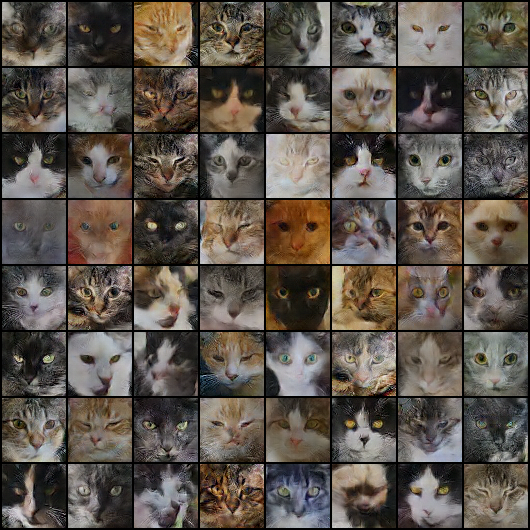

In [13]:
generator = torch.load('./models/generator.pth')
latent = torch.randn(64, LATENT_SIZE, 1, 1, device=device)
image = generator(latent)
image = image*0.8+0.4
image = image.cpu().detach()
save_image(image, './2.png', nrow=8)
Image('./2.png')

In [36]:
import tkinter as tk
from tkinter import ttk

def createNewImage():
    latent = torch.randn(64, LATENT_SIZE, 1, 1, device=device)
    image = generator(latent)
    image = image*0.8+0.4
    image = image.cpu().detach()
    save_image(image, './T.png', nrow=8)

def clicked():
    global photo
    createNewImage()
    photo = PhotoImage(file = f'./T.png')
    photo = photo.subsample(1,1)
    button.configure(image=photo)


root = tk.Tk()
root.title('(^._.^)')

createNewImage()
photo = PhotoImage(file = f'./T.png')
photo = photo.subsample(1,1)

topLabel = Label(root, text='These cats do not exist!')
topLabel.place(relx=0.5, rely=0.04, anchor = 'center') 
topLabel.config(font=("Courier", 15))

button = ttk.Button(root, image=photo, command=clicked)
button.grid(column=0, row=0, padx=50, pady=50)

bottomLabel = Label(root, text='Click image to generate a new collection!')
bottomLabel.place(relx=0.5, rely=0.95, anchor = 'center')
bottomLabel.config(font=("Courier", 15))

root.mainloop()